<a href="https://colab.research.google.com/github/RiyaParikh0112/100-Days-of-ML/blob/main/catdogclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:04<00:00, 303MB/s]
100% 1.06G/1.06G [00:04<00:00, 268MB/s]


In [11]:
import zipfile

In [12]:
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')

In [13]:
zip_ref.close()

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D, Flatten, BatchNormalization, Dropout


In [15]:
#create generators
# generators divide the data set into batches so that you dont have to use them all at once
# and it will not take up all the processing power in large dataset

#we will create 2 generators, one for training data and the other for validation data
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int', #cats will be assigned 0  and dogs will be assigned 1
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int', #cats will be assigned 0  and dogs will be assigned 1
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
# This images are stored in the form of a numpy array
# and the value in the numpy array is from 0-255 so we need to change it to 0-1
# Therefore we need to NORMALIZE
def process(image,label):
  image = tf.cast(image/255 , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [26]:
#create a CNN model
model  = Sequential()
#layer 1
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu', input_shape= (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'))
model.add(BatchNormalization())

#layer 2
model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding= 'valid'))
model.add(BatchNormalization())

#layer 3
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2 , padding='valid'))
model.add(BatchNormalization())

#Flatten the layer
model.add(Flatten())

# We will add 3 Fully Connected (FC) Layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid')) #output layer

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 127, 127, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                      

In [27]:
#compile the model
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=(['accuracy']))

In [28]:
#run the model
history = model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 63s 99ms/step - loss: 2.0988 - accuracy: 0.5807 - val_loss: 0.6458 - val_accuracy: 0.6196
Epoch 2/10
625/625 [==============================] - 61s 97ms/step - loss: 0.5953 - accuracy: 0.6840 - val_loss: 0.5347 - val_accuracy: 0.7326
Epoch 3/10
625/625 [==============================] - 61s 97ms/step - loss: 0.4990 - accuracy: 0.7590 - val_loss: 0.5146 - val_accuracy: 0.7466
Epoch 4/10
625/625 [==============================] - 61s 96ms/step - loss: 0.4271 - accuracy: 0.7994 - val_loss: 0.4978 - val_accuracy: 0.7798
Epoch 5/10
625/625 [==============================] - 61s 97ms/step - loss: 0.3511 - accuracy: 0.8408 - val_loss: 0.4345 - val_accuracy: 0.8040
Epoch 6/10
625/625 [==============================] - 61s 97ms/step - loss: 0.2755 - accuracy: 0.8806 - val_loss: 0.6057 - val_accuracy: 0.7638
Epoch 7/10
625/625 [==============================] - 61s 97ms/step - loss: 0.2088 - accuracy: 0.9119 - val_loss: 0.6377 - val_accuracy:

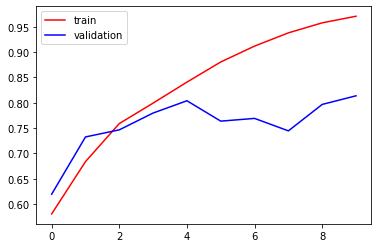

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

The graph above shows that the validation accuracy is lower than that of the training accuracy, which means that there is a case of overfitting in the training data

In [ ]:
# To reduce overfitting
"""
1. Provide more Data
2. Data Augmentation
3. L1/L2 Regularization
4. Dropout
5. Batch Normalization
6. Reduce Complexity
"""
# from keras.layers import BatchNormalization, Dropout

# model.add(BatchNormalization())
# model.add(Dropout(0.1))

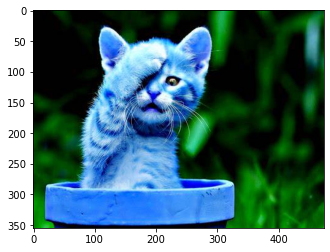

In [30]:
# running on a test image
import cv2
test_img = cv2.imread('/content/cat.jpg')
plt.imshow(test_img)


In [31]:
test_img.shape

(355, 474, 3)

In [32]:
test_img = cv2.resize(test_img,(256,256))

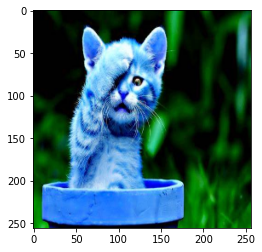

In [34]:
plt.imshow(test_img)

In [35]:
test_input = test_img.reshape((1,256,256,3))

In [39]:
model.predict(test_input)

1/1 [==============================] - 0s 15ms/step


array([[1.]], dtype=float32)